# Sheth LUJ And SIR MV college

Kunal joshi T086

Practical no : 07

Aim : Logistic Regression and Decision Tree
* Build a logistic regression model to predict a binary outcome.
* Evaluate the model's performance using classification metrics (e.g., accuracy,
precision, recall).
* Construct a decision tree model and interpret the decision rules for
classification.

# **Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
data = "heart.csv"
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Prediction
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 77.04918032786885


In [ ]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[19 11]
 [ 3 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.63      0.73        30
           1       0.72      0.90      0.80        31

    accuracy                           0.77        61
   macro avg       0.79      0.77      0.77        61
weighted avg       0.79      0.77      0.77        61



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.717948717948718
Recall: 0.9032258064516129
F1-score: 0.8


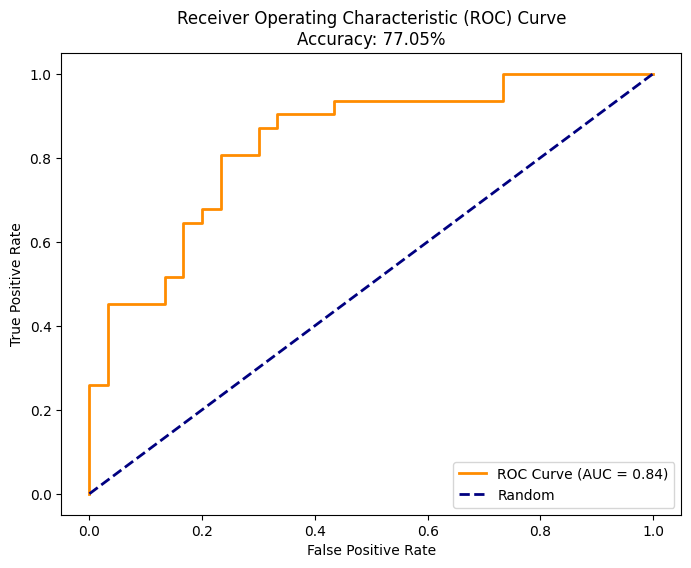

In [ ]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    acc * 100))
plt.legend(loc="lower right")
plt.show()

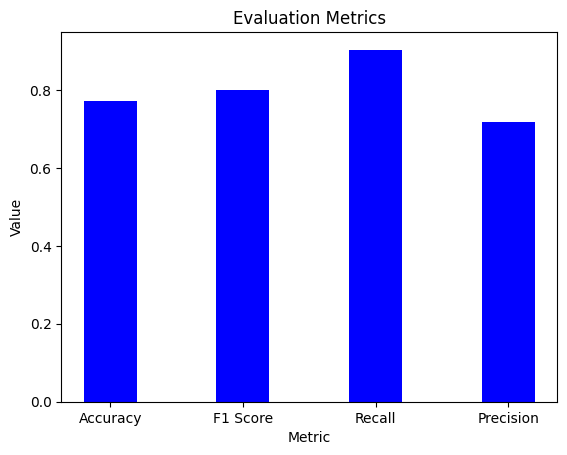

In [ ]:
# Create a list of metrics
metrics = ["Accuracy", "F1 Score", "Recall", "Precision"]

# Create a list of values
values = [acc, f1, recall, precision]

# Create a bar chart
plt.bar(metrics, values, color='blue', width=0.4)

# Add title and axis labels
plt.title("Evaluation Metrics")
plt.xlabel("Metric")
plt.ylabel("Value")

# Show the plot
plt.show()

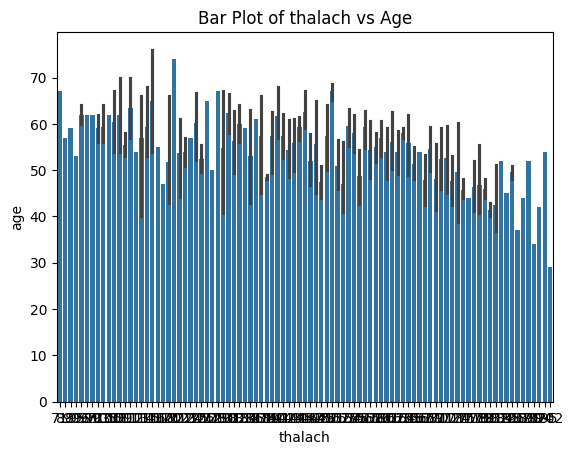

In [ ]:
# Bar plot of Purchased vs Age
sns.barplot(x='thalach', y='age', data=df)
plt.xlabel('thalach')
plt.ylabel('age')
plt.title('Bar Plot of thalach vs Age')
plt.show()


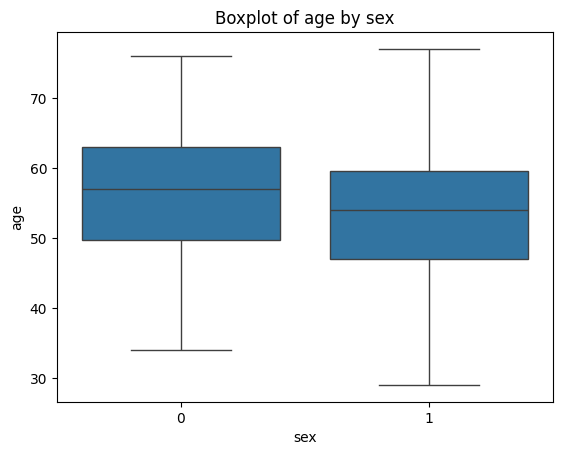

In [ ]:
# Boxplot of EstimatedSalary by Purchased
sns.boxplot(x='sex', y='age', data=df)
plt.xlabel('sex')
plt.ylabel('age')
plt.title('Boxplot of age by sex')
plt.show()

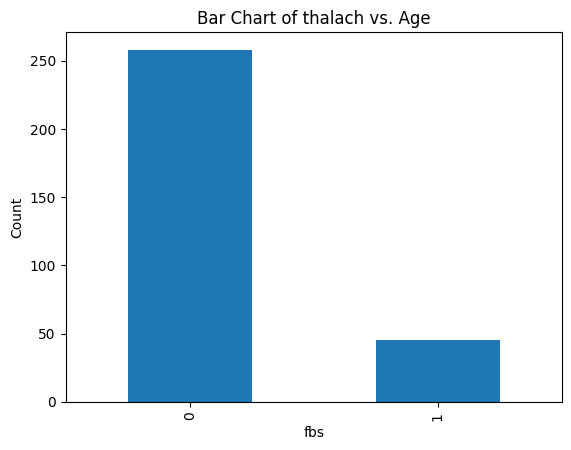

In [ ]:
# Create a bar chart of Purchased vs. Age
df['fbs'].value_counts().plot(kind='bar')
plt.xlabel('fbs')
plt.ylabel('fbs')
plt.title('Bar Chart of thalach vs. Age')
plt.show()

# **Decision Tree**

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [21]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BP'] = le.fit_transform(df.BP)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Cholesterol'] = le.fit_transform(df.Cholesterol)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Na_to_K'] = le.fit_transform(df.Na_to_K)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Drug'] = le.fit_transform(df.Drug)

In [27]:
df['Age']=df.groupby("Sex")['Age'].transform(lambda x: x.fillna(x.mean()))

In [28]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,4
1,47,1,1,0,89,2
2,47,1,1,0,43,2
3,28,0,2,0,10,3
4,61,0,1,0,133,4
...,...,...,...,...,...,...
195,56,0,1,0,69,2
196,16,1,1,0,75,2
197,52,1,2,0,36,3
198,23,1,2,1,102,3


In [ ]:
X = df[['BP','Cholesterol','Na_to_K']]
y= df['Sex']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

# **Checking accuracy of testing dataset**

In [ ]:
from sklearn.metrics import accuracy_score
import math
predictions_test=clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, predictions_test)*100)

Accuracy :  57.49999999999999


# **Checking accuracy of training dataset**

In [ ]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

1.0

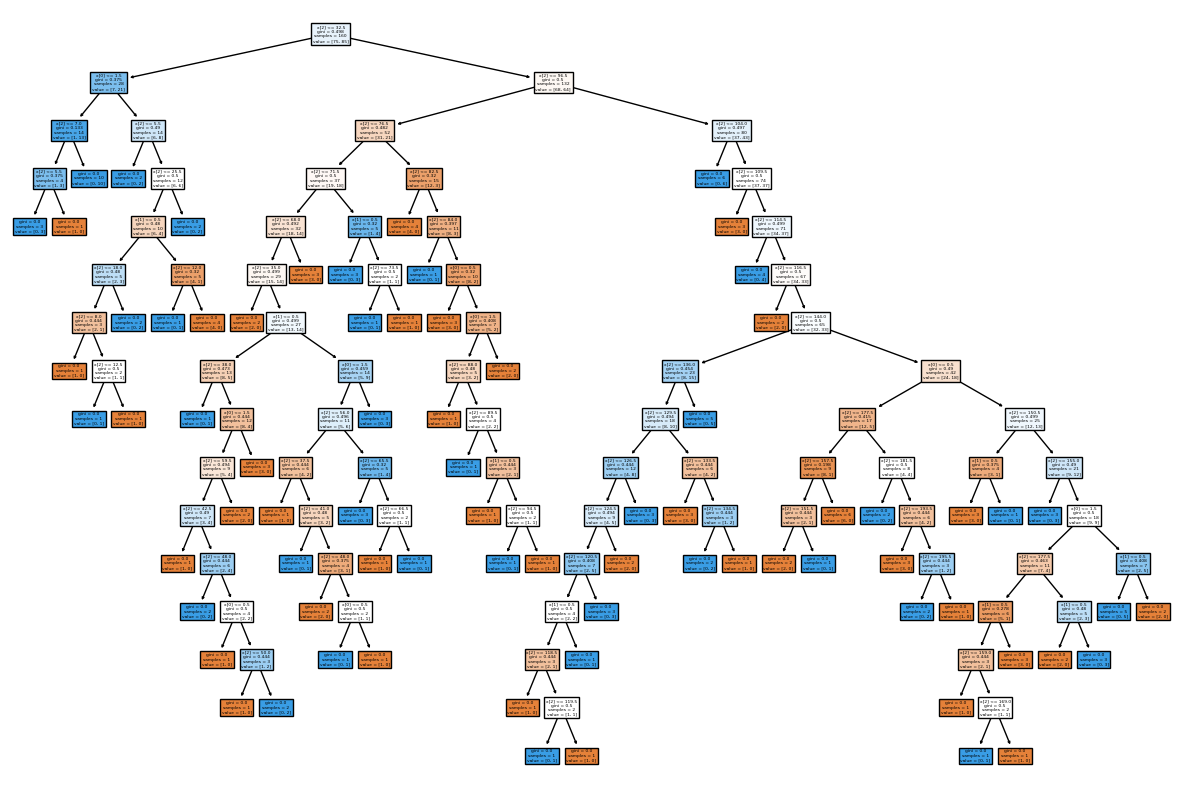

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

# **Evaluating our test dataset**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54        21
           1       0.54      0.68      0.60        19

    accuracy                           0.57        40
   macro avg       0.58      0.58      0.57        40
weighted avg       0.59      0.57      0.57        40

[[10 11]
 [ 6 13]]


# **Evaluating our training dataset**

In [ ]:
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        85

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

[[75  0]
 [ 0 85]]


# **Finding false positive rate and true positive rate**

In [ ]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
dt_probs = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)
print("FPR :",fpr_dt)
print("TPR :",tpr_dt)
print("Threshold :",thresholds_dt)

FPR : [0.         0.52380952 1.        ]
TPR : [0.         0.68421053 1.        ]
Threshold : [2. 1. 0.]


# **Plotting ROC curve for our Decision Tree**

In [ ]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.5802005012531328

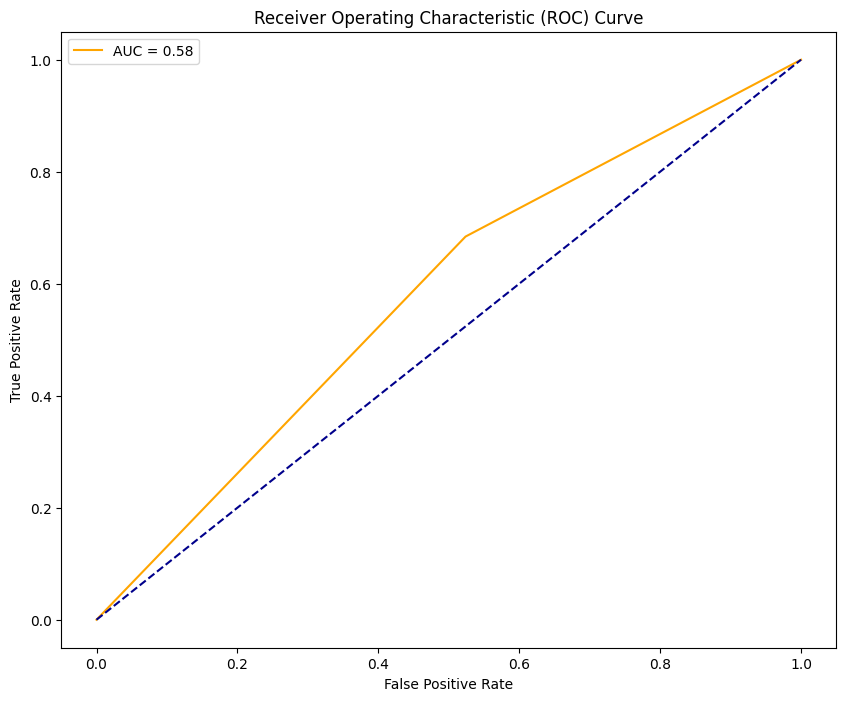

In [ ]:
def plot_roc_curve(fpr, tpr):
  plt.figure(figsize=(10,8))
  plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()
plot_roc_curve(fpr_dt,tpr_dt)

# **Pruning of our decision tree**

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# **Visualizing alpha w.r.t impurity of leaves**

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

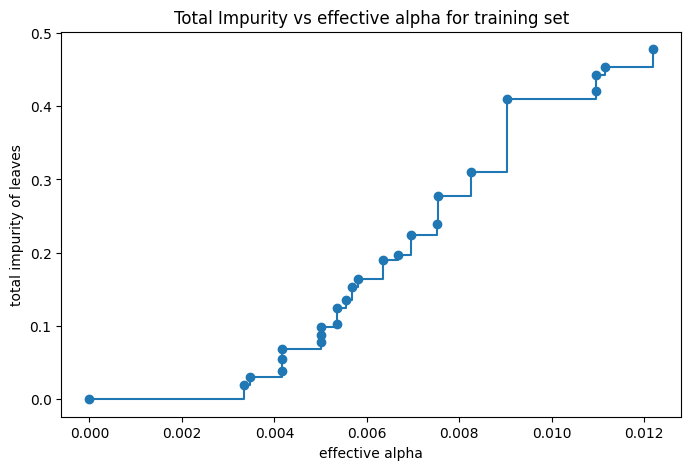

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.020300662878787956


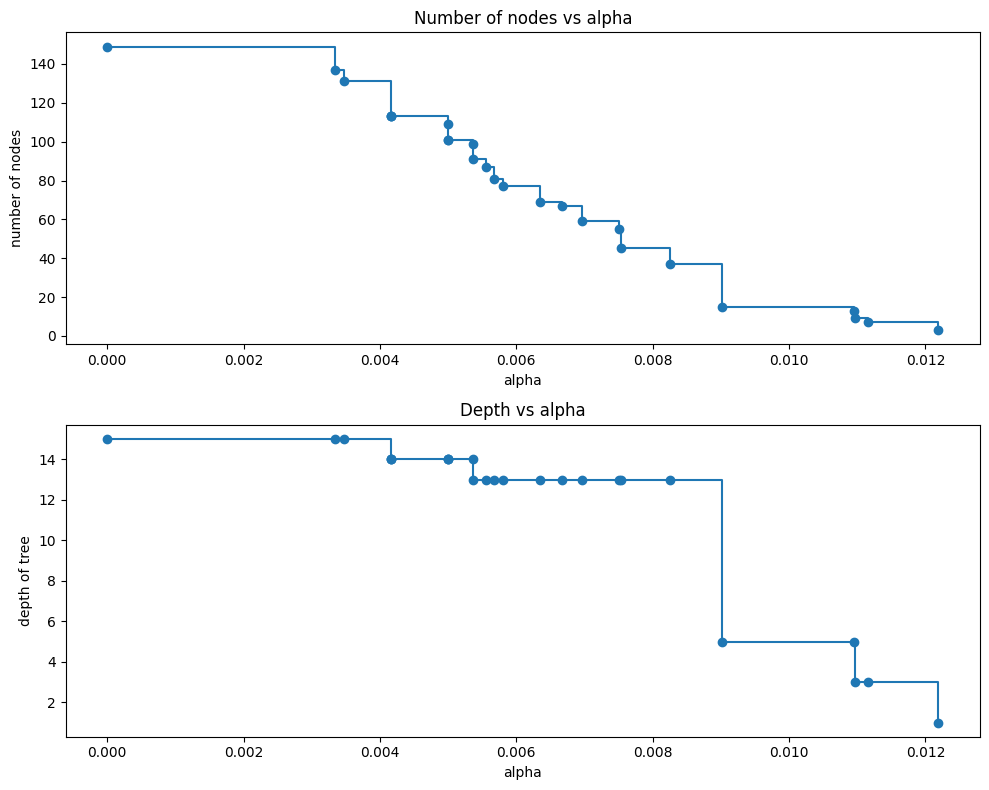

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

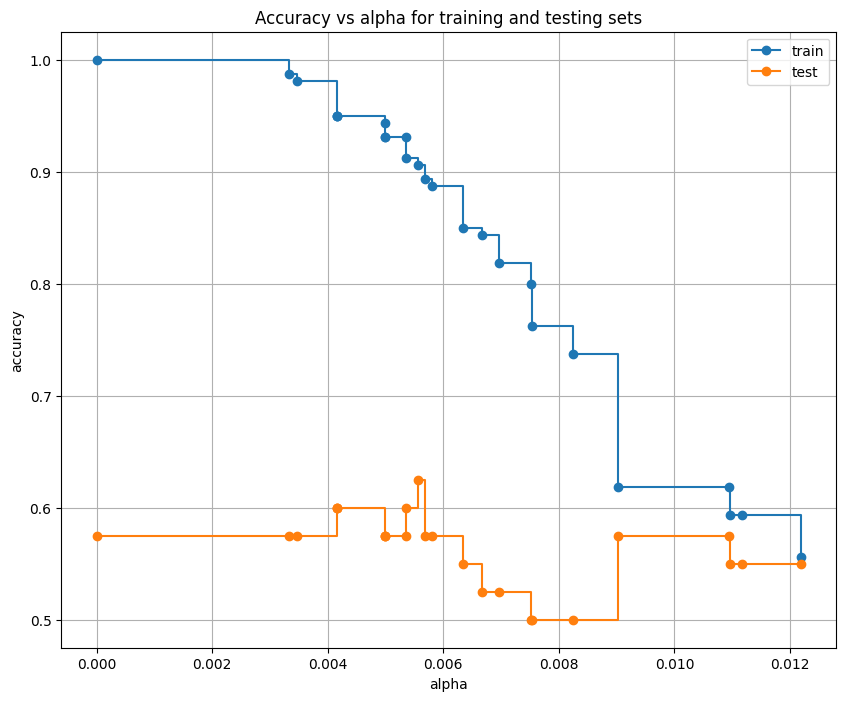

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

# **Accuracy after pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

# **Accuracy of test dataset**

In [ ]:
from sklearn.metrics import accuracy_score
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.55

# **Accuracy of training dataset**

In [ ]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train,pred_1)

0.55625

# **Visualizing after pruning**

[Text(0.5, 0.75, 'x[2] <= 32.5\ngini = 0.498\nsamples = 160\nvalue = [75, 85]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 28\nvalue = [7, 21]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 132\nvalue = [68, 64]')]

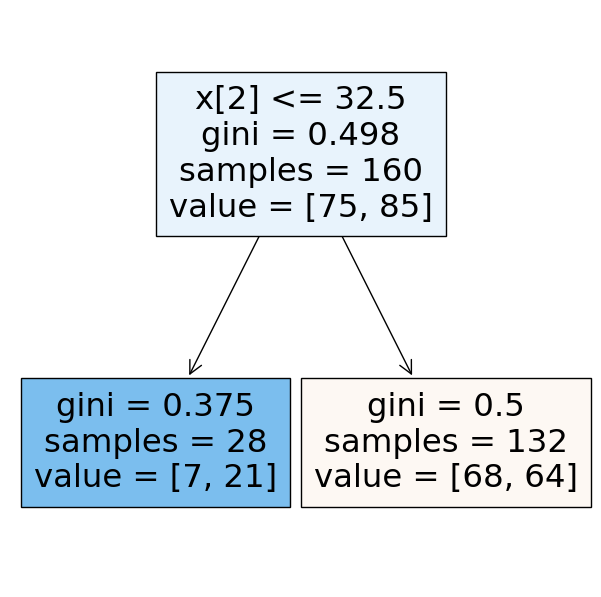

In [ ]:
from sklearn import tree
plt.figure(figsize=(7.5,7.5))
tree.plot_tree(clf,filled=True)